## Первая часть нашей второй части

In [5]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("Сравнительная таблица-1.csv", sep=';', encoding='windows-1251')
df

,Спортивный комплекс,Предоставляемая услуга,Количество занятий,Стоимость
0,ГАУ РМ «Ледовый дворец»,Тренажерный зал,1 занятие,250
1,ГАУ РМ «Ледовый дворец»,Тренажерный зал,Клуб карта на 1 мес,1600
2,ГАУ РМ «Ледовый дворец»,Тренажерный зал,льготный 1 мес,800
3,ГАУ РМ «Ледовый дворец»,Тренажерный зал,Абонемент на 3 мес,4500
4,ГАУ РМ «Ледовый дворец»,Тренажерный зал,Абонемент на 6 мес,8500
5,АУ РМ «СК «Мордовия,Тренажерный зал,1 занятие,350
6,АУ РМ «СК «Мордовия,Тренажерный зал,Клуб карта на 1 мес,2100
7,АУ РМ «СК «Мордовия,Тренажерный зал,льготный 1 мес,1050
8,АУ РМ «СК «Мордовия,Тренажерный зал,Абонемент на 3 мес,5000
9,АУ РМ «СК «Мордовия,Тренажерный зал,Абонемент на 6 мес,9000


Мы импортировали Data Frame, далее сделаем группировку с помощью crosstab.

In [8]:
data = pd.crosstab(index=df['Предоставляемая услуга'],
                    columns=df['Спортивный комплекс'], 
                    values=df['Стоимость'], 
                    aggfunc='mean').reset_index()
data.head()

Спортивный комплекс,Предоставляемая услуга,АУ РМ «СК «Мордовия,ГАУ РМ «Ледовый дворец»
0,Солярий,307.5,458.5
1,Тренажерный зал,3500.0,3130.0
2,Фитнес,3360.0,3230.0


импортировали матплотлиб

In [9]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x26e7b625e50>,
 [Text(0, 0, 'Солярий'), Text(1, 0, 'Тренажерный зал'), Text(2, 0, 'Фитнес')])

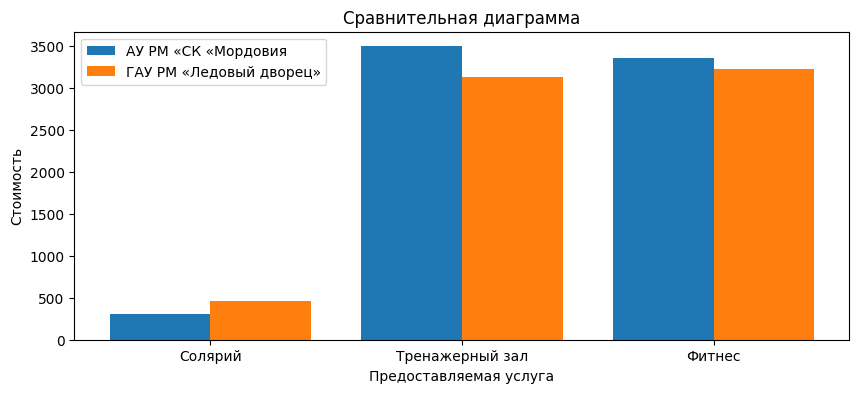

In [10]:
plt.figure(figsize=(10,4))
n_ticks = np.arange(len(data['Предоставляемая услуга']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data["АУ РМ «СК «Мордовия"], width=w)
plt.bar(n_ticks + offset, data['ГАУ РМ «Ледовый дворец»'], width=w)
plt.title('Сравнительная диаграмма')
plt.xlabel('Предоставляемая услуга')
plt.ylabel('Стоимость')
plt.legend(['АУ РМ «СК «Мордовия', 'ГАУ РМ «Ледовый дворец»'])
plt.xticks(n_ticks, data['Предоставляемая услуга'], rotation= 0)

сделаем две отдельные группы

In [11]:
a_group = df['Стоимость'][df['Спортивный комплекс'] == 'ГАУ РМ «Ледовый дворец»']
b_group = df['Стоимость'][df['Спортивный комплекс'] == 'АУ РМ «СК «Мордовия']
a_group

0      250
1     1600
2      800
3     4500
4     8500
10     250
11    1800
12    1100
13    4500
14    8500
20      17
21     900
Name: Стоимость, dtype: int64

импортируем scipy

In [12]:
import scipy
from scipy import stats

In [13]:
# распределение не является нормальным так как pvalue < альфы

scipy.stats.shapiro(a_group)
scipy.stats.shapiro(b_group)

ShapiroResult(statistic=0.8116124868392944, pvalue=0.012736338190734386)

In [14]:
# по результатам данного теста, можно сделать вывод, что статистически значимых различий в цене не обнаружено

stats.ttest_ind(a_group, b_group)

TtestResult(statistic=-0.14281415462708683, pvalue=0.8877368930120308, df=22.0)